<a href="https://colab.research.google.com/github/MOHAMED-ALIYAR/Airbnb_analysis/blob/main/Churn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#import the dependecies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [14]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
df.shape

(10000, 14)

In [16]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [17]:
df.duplicated().sum()

0

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<Axes: >

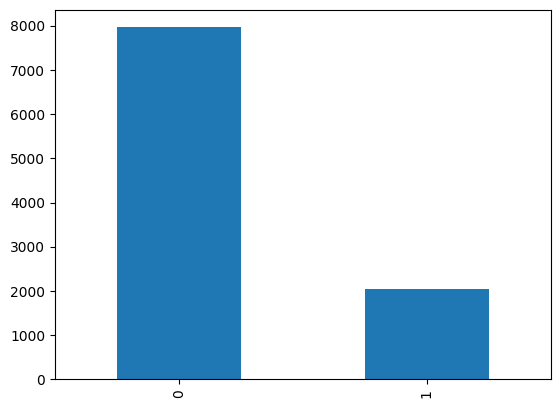

In [19]:
df['Exited'].value_counts().plot(kind='bar')

In [20]:
print('The Person is not Exited occurs in ',(len(df[df['Exited']==0])/df.shape[0])*100,'% data')

The Person is not Exited occurs in  79.63 % data


It is an unbalanced dataset

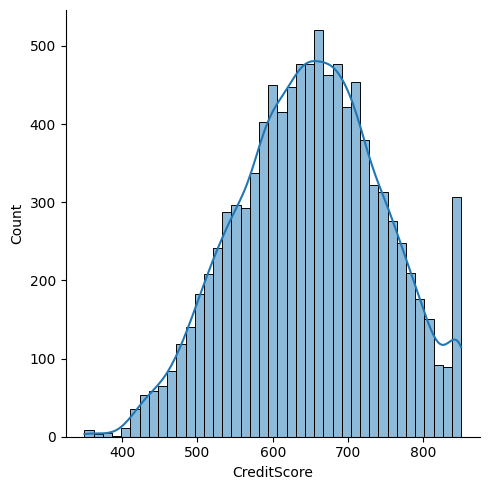

In [21]:
sns.displot(df['CreditScore'],kde=True)

In [22]:
print('Skewness :',df['CreditScore'].skew())

Skewness : -0.07160660820092675


<Axes: xlabel='Age', ylabel='Count'>

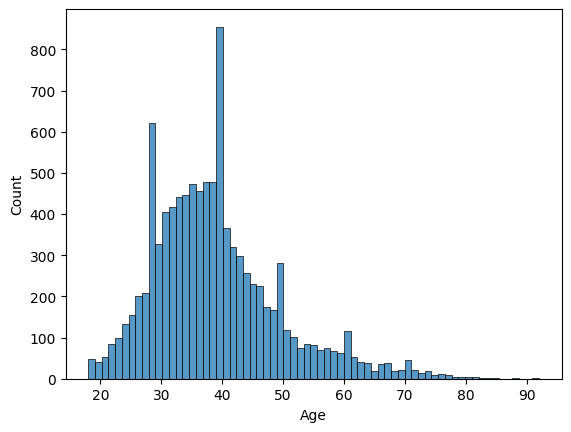

In [23]:
sns.histplot(df['Age'])

<Axes: >

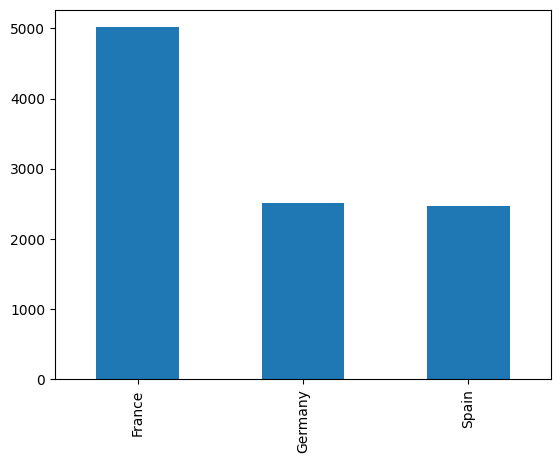

In [24]:
df['Geography'].value_counts().plot(kind='bar')

<Axes: >

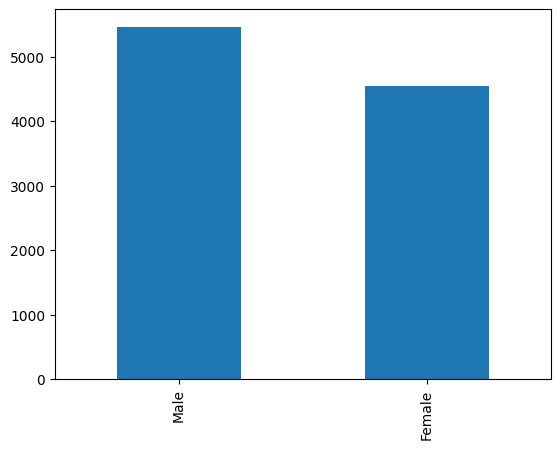

In [25]:
df['Gender'].value_counts().plot(kind='bar')

In [26]:
#France-0
#Germany-1
#Spain-2

df['Geography']=df['Geography'].map({'France':0,'Germany':1,'Spain':2})


In [27]:
#Male-0
#Female-1
df['Gender']=df['Gender'].map({'Male':0,'Female':1})

In [28]:

x=df.iloc[:,3:13]
y=df.iloc[:,13]

In [29]:
#Balancing the data
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
x_sm,y_sm=smote.fit_resample(x,y)

In [30]:
#train-test-split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.3)

<Axes: >

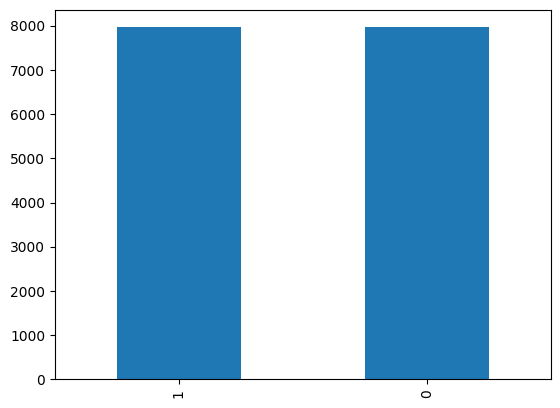

In [31]:
y_sm.value_counts().plot(kind='bar')

In [32]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [33]:
x_train.shape

(11148, 10)

In [34]:
x_test.shape

(4778, 10)

In [35]:
#import ANN libaraies

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout
import tensorflow as tf


In [36]:
classifier=Sequential()

In [37]:
# input layer
classifier.add(Dense(units=11,activation='relu'))

#Firsr hidden layer
classifier.add(Dense(units=9,activation='relu'))

#Second hidden layer
classifier.add(Dense(units=6,activation='relu'))

#output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [38]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [39]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=0)

In [40]:
model=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
747/747 [==============================] - 5s 5ms/step - loss: 0.5990 - accuracy: 0.6575 - val_loss: 0.5173 - val_accuracy: 0.7491
Epoch 2/50
747/747 [==============================] - 3s 4ms/step - loss: 0.4976 - accuracy: 0.7559 - val_loss: 0.4810 - val_accuracy: 0.7622
Epoch 3/50
747/747 [==============================] - 2s 3ms/step - loss: 0.4727 - accuracy: 0.7705 - val_loss: 0.4604 - val_accuracy: 0.7790
Epoch 4/50
747/747 [==============================] - 2s 3ms/step - loss: 0.4556 - accuracy: 0.7823 - val_loss: 0.4499 - val_accuracy: 0.7877
Epoch 5/50
747/747 [==============================] - 3s 3ms/step - loss: 0.4446 - accuracy: 0.7889 - val_loss: 0.4403 - val_accuracy: 0.7915
Epoch 6/50
747/747 [==============================] - 3s 4ms/step - loss: 0.4377 - accuracy: 0.7960 - val_loss: 0.4368 - val_accuracy: 0.7929
Epoch 7/50
747/747 [==============================] - 3s 4ms/step - loss: 0.4318 - accuracy: 0.8017 - val_loss: 0.4298 - val_accuracy: 0.7980
Epoch 

In [41]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

150/150 [==============================] - 0s 2ms/step


In [42]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8070322310590206

In [ ]:
#pickle file
model=pickle.dump(classifie('keras2.pkl','wb')